In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
#from sklearn.externals import joblib

In [3]:
pimas = pd.read_csv('Desktop/PimasDiabetes.csv')
pimas.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# iterate over rows with iterrows()
mydict = dict()
X = list()
Y = list()

#Create dictionaries to hold the counts and sums of BMI by age
for index, row in pimas.iterrows():
    
    #don't add null values of BMI
    if row['BMI'] > 0:
        chk = mydict.get(int(row['Age']))
        #See if the Age is already in the dictionary. The Key is age and the value is a tuple with the sum and a count
        if chk:
            #It is so just compute sums
            mydict[int(row['Age'])] = (chk[0]+row['BMI'],chk[1]+1)
        else:
            #It is not so initialize that key
            mydict[int(row['Age'])] = (row['BMI'],1)

#Create lists for graphing based on the dictionaries
for key in sorted(mydict.keys()):
    (sums, counts) = mydict.get(key)
    X.append(key)
    Y.append(sums/counts)
    
    #print(key,counts,round(sums,1),round(sums/counts,1))
    print(key,"{: >2} {: >8}{: >5}".format(counts,round(sums,1),round(sums/counts,1)))

21 60   1752.5 29.2
22 70   2124.7 30.4
23 38   1197.1 31.5
24 45   1498.2 33.3
25 47   1533.3 32.6
26 32   1152.2 36.0
27 32   1022.4 31.9
28 35   1177.5 33.6
29 29    972.7 33.5
30 20    630.7 31.5
31 24    816.4 34.0
32 16    517.1 32.3
33 17    549.7 32.3
34 14    436.3 31.2
35 10    337.8 33.8
36 16    507.5 31.7
37 19    609.5 32.1
38 16    569.1 35.6
39 12    383.8 32.0
40 13    436.0 33.5
41 22    775.7 35.3
42 18    629.7 35.0
43 13    479.6 36.9
44  8    273.3 34.2
45 15    524.4 35.0
46 13    448.8 34.5
47  6    207.4 34.6
48  5    149.9 30.0
49  5    160.1 32.0
50  8    249.8 31.2
51  8    271.8 34.0
52  8    267.8 33.5
53  5    152.5 30.5
54  5    184.8 37.0
55  4    108.1 27.0
56  3     95.1 31.7
57  5    148.5 29.7
58  7    227.0 32.4
59  3     80.9 27.0
60  5    143.7 28.7
61  2     60.0 30.0
62  4    115.8 29.0
63  4    123.1 30.8
64  1     25.0 25.0
65  3     94.8 31.6
66  4    121.5 30.4
67  3     86.3 28.8
68  1     35.6 35.6
69  1     26.8 26.8
70  1     32.5 32.5


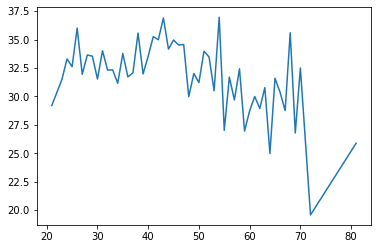

In [5]:
plt.plot(X,Y)